In [2]:
import nltk
import string
import pandas as pd
import nlp_utils as nu
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dialogs.txt', names=('Query','Response'), sep=('\t'))
df

,Query,Response
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.
...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?
3721,are you right-handed?,yes. all my life.
3722,yes. all my life.,you're wearing out your right hand. stop using...
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


In [4]:
df.shape

(3725, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Query     3725 non-null   object
 1   Response  3725 non-null   object
dtypes: object(2)
memory usage: 58.3+ KB


In [6]:
df.columns

Index(['Query', 'Response'], dtype='object')

In [7]:
df.describe().T

,count,unique,top,freq
Query,3725,3510,what do you mean?,22
Response,3725,3512,what do you mean?,22


In [14]:
df.columns.value_counts()

Query       1
Response    1
dtype: int64

In [13]:
df['Response'].value_counts()

what do you mean?                                                       22
why not?                                                                16
what happened?                                                          10
why is that?                                                             9
of course.                                                               8
                                                                        ..
i don't understand some things.                                          1
let me help you.                                                         1
what does "mi" mean?                                                     1
mi stands for middle initial.                                            1
start typing instead. that way your left hand will do half the work.     1
Name: Response, Length: 3512, dtype: int64

In [11]:
df.isna().sum()

Query       0
Response    0
dtype: int64

In [12]:
df.nunique()

Query       3510
Response    3512
dtype: int64

## Data Visualisation

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [16]:
Text=df['Query']

In [19]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
for sentence in Text:
    print(sentence)

    ss = sid.polarity_scores(sentence)
    for k in ss:
        print('{0}:{1}, '.format(k, ss[k]), end='')
    print()

Streaming output truncated to the last 5000 lines.
of course i heard that. i thought a plane had crashed into your house.
neg:0.0, neu:1.0, pos:0.0, compound:0.0, 
it wasn't that loud.
neg:0.0, neu:1.0, pos:0.0, compound:0.0, 
i will blow my nose sometime for you, and you'll see.
neg:0.0, neu:1.0, pos:0.0, compound:0.0, 
okay. i'll take your word for it.
neg:0.0, neu:0.759, pos:0.241, compound:0.2263, 
i thought you had an elephant in your house.
neg:0.0, neu:1.0, pos:0.0, compound:0.0, 
you're funny.
neg:0.0, neu:0.256, pos:0.744, compound:0.4404, 
what did you say? i think i've gone deaf.
neg:0.0, neu:1.0, pos:0.0, compound:0.0, 
i have lots of friends.
neg:0.0, neu:0.492, pos:0.508, compound:0.4767, 
really? how many do you have?
neg:0.0, neu:1.0, pos:0.0, compound:0.0, 
i don't know, maybe one hundred.
neg:0.0, neu:1.0, pos:0.0, compound:0.0, 
that is a lot of friends. do you have a best friend?
neg:0.0, neu:0.4, pos:0.6, compound:0.8885, 
of course. i have lots of best friends.
ne

In [20]:
analyzer = SentimentIntensityAnalyzer()
df['rating'] = Text.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)

In [21]:
df

,Query,Response,neg,neu,pos,compound
0,"hi, how are you doing?",i'm fine. how about yourself?,0.000,1.000,0.000,0.0000
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,0.000,0.690,0.310,0.2023
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,0.000,0.250,0.750,0.8402
3,no problem. so how have you been?,i've been great. what about you?,0.495,0.505,0.000,-0.5994
4,i've been great. what about you?,i've been good. i'm in school right now.,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?,0.000,0.707,0.293,0.4404
3721,are you right-handed?,yes. all my life.,0.000,1.000,0.000,0.0000
3722,yes. all my life.,you're wearing out your right hand. stop using...,0.000,0.526,0.474,0.4019
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.,0.153,0.625,0.222,0.2500


In [22]:
from wordcloud import WordCloud

In [23]:
def wordcloud(df, label):
    subset=df[df[label]==1]
    text=df.Query.values
    wc=WordCloud(background_color='black',max_words=1000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap='gist_earth', random_state=244), alpha=0.98)

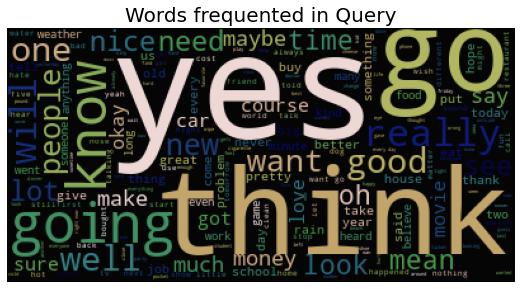

In [24]:
wordcloud(df, 'Query')

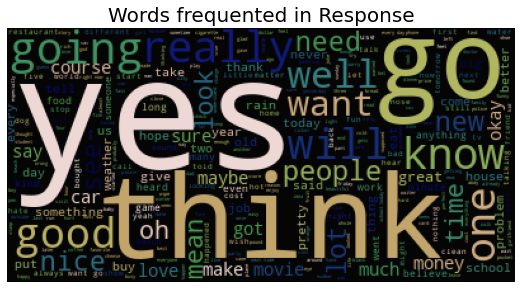

In [25]:
wordcloud(df,'Response')

In [26]:
import re

In [37]:
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
# Lower case conversion

In [38]:
remove_n = lambda x: re.sub("\n", " ", x)
# removing \n and replacing them with empty value

In [39]:
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
# removing non ascii characters

In [40]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

In [41]:
df['Query'] = df['Query'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [42]:
df['Response'] = df['Response'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [43]:
df

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.000,1.000,0.000,0.0000
1,i m fine how about yourself,i m pretty good thanks for asking,0.000,0.690,0.310,0.2023
2,i m pretty good thanks for asking,no problem so how have you been,0.000,0.250,0.750,0.8402
3,no problem so how have you been,i ve been great what about you,0.495,0.505,0.000,-0.5994
4,i ve been great what about you,i ve been good i m in school right now,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that s a good question maybe it s not old age,are you right handed,0.000,0.707,0.293,0.4404
3721,are you right handed,yes all my life,0.000,1.000,0.000,0.0000
3722,yes all my life,you re wearing out your right hand stop using...,0.000,0.526,0.474,0.4019
3723,you re wearing out your right hand stop using...,but i do all my writing with my right hand,0.153,0.625,0.222,0.2500


In [44]:
pd.set_option('display.max_rows', 3000)

In [45]:
df

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.000,1.000,0.000,0.0000
1,i m fine how about yourself,i m pretty good thanks for asking,0.000,0.690,0.310,0.2023
2,i m pretty good thanks for asking,no problem so how have you been,0.000,0.250,0.750,0.8402
3,no problem so how have you been,i ve been great what about you,0.495,0.505,0.000,-0.5994
4,i ve been great what about you,i ve been good i m in school right now,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that s a good question maybe it s not old age,are you right handed,0.000,0.707,0.293,0.4404
3721,are you right handed,yes all my life,0.000,1.000,0.000,0.0000
3722,yes all my life,you re wearing out your right hand stop using...,0.000,0.526,0.474,0.4019
3723,you re wearing out your right hand stop using...,but i do all my writing with my right hand,0.153,0.625,0.222,0.2500


In [46]:
imp_sent = df.sort_values(by='compound', ascending=False)


In [47]:
imp_sent.head()

,Query,Response,neg,neu,pos,compound
1019,if we are good we will be happy in heaven wit...,that s what many people believe,0.0,0.400,0.600,0.9001
565,yeah it sounds like it s going to be the best...,exactly it seems like it s going to be loads ...,0.0,0.463,0.537,0.8910
1235,that is a lot of friends do you have a best f...,of course i have lots of best friends,0.0,0.400,0.600,0.8885
3414,well that s okay as long as it helps him rel...,yes we need a relaxed president who thinks cl...,0.0,0.419,0.581,0.8883
3470,so it s better to save money than to have an h...,well the democratic party says it was an hone...,0.0,0.482,0.518,0.8651


In [48]:
pos_sent=df.sort_values(by='pos', ascending=False)
pos_sent.head()

,Query,Response,neg,neu,pos,compound
1659,please,you know the rules,0.0,0.0,1.0,0.3182
1191,yes,no that s incomplete,0.0,0.0,1.0,0.4019
223,well congratulations,thank you,0.0,0.0,1.0,0.7184
2745,i agree,you never know what might happen on these free...,0.0,0.0,1.0,0.3612
3583,sure,thank you,0.0,0.0,1.0,0.3182


In [49]:
neg_sent = df.sort_values(by='neg', ascending=False)
neg_sent.head()

,Query,Response,neg,neu,pos,compound
1294,no,how do you know,1.000,0.000,0.0,-0.2960
2378,no,he had dirty fingernails,1.000,0.000,0.0,-0.2960
154,no problem,did you need something,1.000,0.000,0.0,-0.5994
3095,no i hate vegetables,but you eat fruits,0.855,0.145,0.0,-0.7096
13,never better thanks,so how have you been lately,0.828,0.172,0.0,-0.5875


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
tfidf = TfidfVectorizer()

In [53]:
factors = tfidf.fit_transform(df['Query']).toarray()
# changing column into array

In [54]:
tfidf.get_feature_names()
# displaying feature names

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['able',
 'about',
 'absolutely',
 'accident',
 'accidents',
 'aches',
 'across',
 'act',
 'action',
 'activities',
 'actor',
 'actors',
 'actress',
 'actually',
 'add',
 'added',
 'adding',
 'address',
 'ads',
 'adventure',
 'afford',
 'afraid',
 'after',
 'afternoon',
 'afterwards',
 'again',
 'against',
 'age',
 'ago',
 'agree',
 'ahead',
 'aid',
 'aids',
 'air',
 'airport',
 'aisle',
 'alarm',
 'alice',
 'alive',
 'all',
 'allergic',
 'alley',
 'allow',
 'allowed',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'altitude',
 'always',
 'am',
 'amateur',
 'amazing',
 'american',
 'an',
 'and',
 'andy',
 'angeles',
 'angry',
 'animal',
 'animals',
 'anita',
 'anniversary',
 'another',
 'answer',
 'answered',
 'antenna',
 'any',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'apartment',
 'apologize',
 'apologized',
 'apples',
 'appointment',
 'appreciate',
 'april',
 'are',
 'aren',
 'argument',
 'arizona',
 'arm',
 'arms',
 'army',
 'around',
 'arrow',
 'art',
 'a

In [55]:
from sklearn.metrics.pairwise import cosine_distances

In [58]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [61]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [63]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [59]:
query = 'who are you ?'
def chatbot(query):
    # step:-1 clean
    query = nu.lemmatization_sentence(query)
    # step:-2 word embedding - transform
    query_vector = tfidf.transform([query]).toarray()
    # step-3: cosine similarity
    similar_score = 1 -cosine_distances(factors,query_vector)
    index = similar_score.argmax() # take max index position
    # searching or matching question
    matching_question = df.loc[index]['Query']
    response = df.loc[index]['Response']
    pos_score = df.loc[index]['pos']
    neg_score = df.loc[index]['neg']
    neu_score = df.loc[index]['neu']
    confidence = similar_score[index][0]
    chat_dict = {'match':matching_question,
                'response':response,
                'score':confidence,
                'pos':pos_score,
                'neg':neg_score,
                'neu':neu_score}
    return chat_dict

In [65]:
while True:
    query = input('USER: ')
    if query == 'exit':
        break
        
    response = chatbot(query)
    if response['score'] <= 0.2: # 
        print('BOT: Please rephrase your Question.')
    
    else:
        print('='*80)
        print('logs:\n Matched Question: %r\n Confidence Score: %0.2f \n PositiveScore: %r \n NegativeScore: %r\n NeutralScore: %r'%(
            response['match'],response['score']*100,response['pos'],response['neg'],response['neu']))
        print('='*80)
        print('BOT: ',response['response'])

KeyboardInterrupt: ignored